<a href="https://colab.research.google.com/github/Christinastalin/DataScience-/blob/main/HR_Analytics_for_employee_churn_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset
df=pd.read_csv('/content/people.csv')

In [7]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent_company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [8]:
df.shape

(14999, 10)

In [6]:
#renaming a column name having special character
df.rename(columns={'timeSpent.company':'timeSpent_company'}, inplace = True)

In [12]:
#checking for duplicate rows
df.duplicated().sum()

np.int64(3008)

In [13]:
#dropping the duplicate rows
df.drop_duplicates(inplace=True, keep='first')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      11991 non-null  float64
 1   lastEvaluation         11991 non-null  float64
 2   numberOfProjects       11991 non-null  int64  
 3   avgMonthlyHours        11991 non-null  int64  
 4   timeSpent_company      11991 non-null  int64  
 5   workAccident           11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotionInLast5years  11991 non-null  int64  
 8   dept                   11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [16]:
#Descriptive Analysis
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
#Normality Test
#Checking whether the data is normally distributed or not using Shapiro-Wilk test
from scipy.stats import shapiro



Before applying any hypothesis testing we assume that the Data is normally distributed so that the test is unbiased due to skewed data.



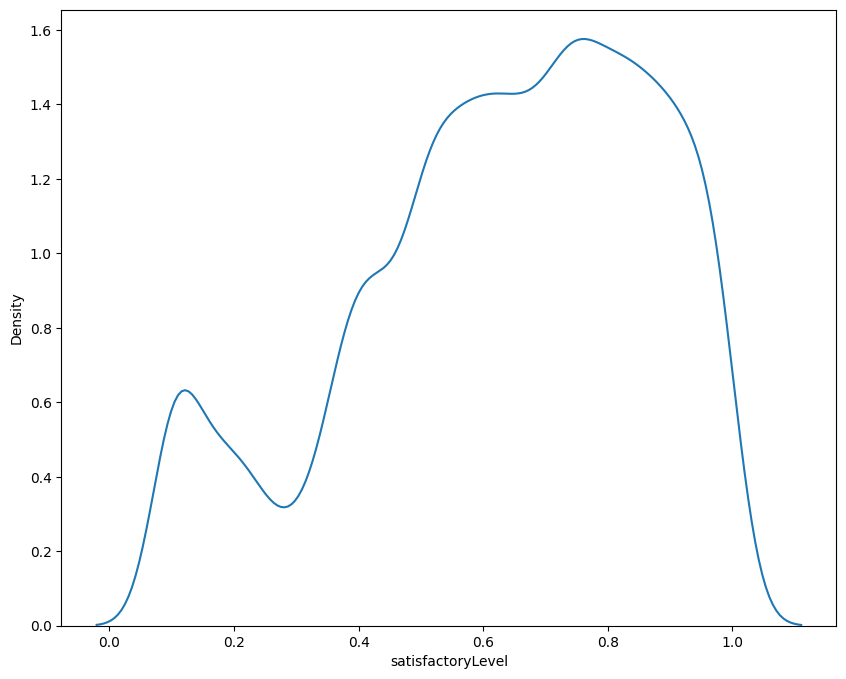

In [22]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['satisfactoryLevel'])
plt.show()

As we can se here in the above graphical representation of the data, the data is not normally distributed and is left skewed. Now let's prove this through Shapiro-Wilk's test.


🌟 What is a Normality Test?

A normality test is a statistical procedure used to determine whether a data sample follows a normal distribution. This is essential because many statistical models (like linear regression, t-tests, ANOVA) assume that the data is normally distributed.


🧪 Common Normality Tests


1. Shapiro-Wilk Test
Best for: Small to moderate datasets (n < 2000).

Hypothesis:

Null (H₀): Data is normally distributed.

Alternate (H₁): Data is not normally distributed.

Output: Test statistic + p-value.

Interpretation:

If p-value > 0.05 → Fail to reject H₀ → Data is normal.

If p-value ≤ 0.05 → Reject H₀ → Data is not normal.



2. Kolmogorov–Smirnov (K-S) Test
Compares the sample with a reference (normal) distribution.

More general but less powerful than Shapiro-Wilk for normality specifically.

Often used with Lilliefors correction.



3. Anderson-Darling Test
More sensitive to deviations in the tails of the distribution.

Returns a statistic and a critical value for various significance levels.

If the test statistic > critical value → Reject normality.



4. D’Agostino’s K² Test
Measures skewness and kurtosis to assess normality.

Better for larger samples.

📊 Visual Methods (Complementary to Tests)
Histogram: Should resemble a bell curve.

Q-Q Plot (Quantile-Quantile): Points should lie on a straight line.

Box Plot: Should have symmetrical whiskers and no extreme outliers for normal data.

🧠 Tips for Usage
Always combine visual inspection with statistical tests.

Transformations (log, square root, Box-Cox) can help if data isn't normal.

In large samples, normality tests are very sensitive—even small deviations can lead to rejecting normality.

In [24]:
stat, p = shapiro(df['satisfactoryLevel'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')
#

stat=0.953, p=0.000
Probably not Gaussian


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11991.
  res = hypotest_fun_out(*samples, **kwds)


P-value in the simplest and clearest way possible — especially useful when you're doing hypothesis testing (like normality tests, t-tests, chi-square, etc.).



🎯 **What is a p-value?**


A p-value is the probability of obtaining results at least as extreme as the observed results, assuming that the null hypothesis is true.

In other words:

It's a measure of how surprising or unlikely your data is, under the assumption that there's no effect or no difference.




🧪 **In Hypothesis Testing**


Null Hypothesis (H₀): There's no effect / no difference / data is normal, etc.

Alternative Hypothesis (H₁): There is an effect / difference / data is not normal, etc.




🔍** How to interpret the p-value:**


p-value	Interpretation
p > 0.05	Not statistically significant → Fail to reject H₀
p ≤ 0.05	Statistically significant → Reject H₀
⚠️ 0.05 is a commonly used significance level (α), but it can vary (e.g., 0.01 or 0.10) depending on how strict you want your test to be.



🎓 Example in Real Terms:


Suppose you're testing if a coin is fair.


H₀: The coin is fair (p = 0.5)

You flip it 10 times and get 9 heads.

A p-value will tell you: What’s the chance of getting 9 or more heads just by random chance, if the coin is actually fair?

If the p-value is low (like 0.01), it's unlikely that this happened by chance → You reject the idea that the coin is fair.





🧠 **Key Points to Remember:**



Small p-value → Evidence against the null hypothesis.

Large p-value → Evidence in favor of the null hypothesis (or at least, not enough evidence to reject it).

p-value does not tell you the probability that H₀ is true or false — it only tells you about the compatibility of the data with H₀.





**🎯 What is Label Encoding?**



Label Encoding is a technique used to convert categorical values into numeric form, so they can be fed into machine learning models which only understand numbers.



**🔢 How it works:**


Each unique category (label) in a column is assigned a unique integer value.

Example:
Suppose we have a column Color = ['Red', 'Green', 'Blue']

After label encoding:

mathematica
Red   → 2  
Green → 1  
Blue  → 0

It just assigns numbers based on alphabetical order (by default in sklearn).



**🧠 Why use Label Encoding?**



Machine learning models require numeric input.

Helps convert textual/categorical data to numerical form.

Useful for ordinal categorical features (those that have a meaningful order like "Low", "Medium", "High").



**⚠️ Caution**



Label Encoding can be problematic for nominal categorical features (no inherent order like Color, Country, etc.), because:

➡️ The model might assume that higher numbers imply higher importance or order.

For such cases, One-Hot Encoding is usually preferred.




**🛠️ Implementation in Python (using sklearn)**

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sample data
df = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']})

# Initialize encoder
le = LabelEncoder()

# Fit and transform
df['Color_encoded'] = le.fit_transform(df['Color'])

print(df)
Output:


   Color  Color_encoded
0    Red              2
1  Green              1
2   Blue              0
3  Green              1
4    Red              2



**✅ When to Use Label Encoding?**



When the categorical variable is ordinal (e.g., 'Low', 'Medium', 'High')

When you’re using tree-based models (like Decision Tree, Random Forest, XGBoost), which don’t assume ordering based on number values.

**🤖 When to Use One-Hot Encoding?**


If the feature is nominal (no meaningful order), like:

Country names

Product types

Brands

You should use One-Hot Encoding instead, to avoid giving a false sense of hierarchy.

In [25]:
#Label encoding salary column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['salary_encoded']=le.fit_transform(df['salary'])

In [26]:
#Encoding dept col as well
df['dept_encoded']=le.fit_transform(df['dept'])

In [27]:
#Displaying the unique labels in salary and dept
print(df['salary_encoded'].unique())
print(df['dept_encoded'].unique())

[1 2 0]
[7 2 3 9 8 0 6 5 4 1]


In [33]:
#Correlation Analysis

Correlation = df.corr(numeric_only=True)

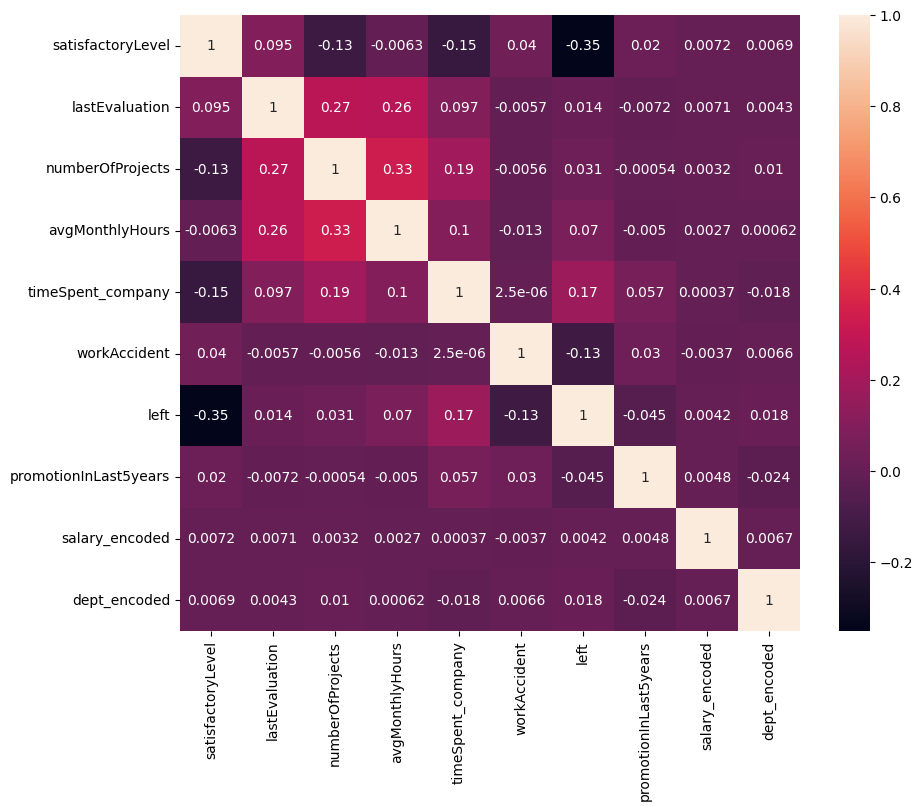

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(Correlation, annot=True)
plt.show()

**🔍 What is Correlation?**


Correlation measures the strength and direction of a relationship between two numerical variables.

🟢 Positive Correlation: When one variable increases, the other also increases.

🔴 Negative Correlation: When one increases, the other decreases.

⚪ Zero Correlation: No relationship at all.






**📏 Correlation Coefficient**



The most common is Pearson correlation coefficient (r):

+1 → Perfect positive linear correlation

0 → No linear correlation

–1 → Perfect negative linear correlation



**🧠 Example:**


Let’s say you have:

Study Hours	Exam Score
1	40
2	50
3	60
4	70
5	80
As study hours increase, exam score increases → high positive correlation.

**📈 Types of Correlation**


Type	Best For
Pearson	Linear relationships (assumes normality)
Spearman	Monotonic relationships (rank-based)
Kendall	Rank correlation (less sensitive to noise)



**🧪 In Python:**

import pandas as pd

Sample data

df = pd.DataFrame({
    'hours': [1, 2, 3, 4, 5],
    'score': [40, 50, 60, 70, 80]
})

Pearson Correlation

correlation = df.corr(method='pearson')
print(correlation)




**📊 When to Use It**




**Feature selection:**


To drop highly correlated features (multicollinearity).


**Exploratory Data Analysis (EDA):**

Understand relationships.



**Hypothesis Testing:**


 To test linear association.



**🤯 Bonus Insight**



If you're working with time series data, you may want to check for autocorrelation instead (i.e., how a variable correlates with its own past values).